In [16]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 

**How much of a factor does the driver have on headway and on-time performance?**

- OPERATOR: Indicates the operator (driver)
- HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping). 

Dependent variables:
- Headway (measured in seconds or any appropriate unit).
- On-time performance (usually measured as a binary variable, such as 1 for on time and 0 for late).

Independent variables:
- Driver-related factors (e.g., experience, training, behavior, etc.).
- Other potential independent variables like road conditions, weather, or vehicle maintenance.

In [3]:
headway_data = pd.read_csv("../data/headway_data.csv", delimiter = '\t')
headway_data.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,-3.883334,1,0,0,0,0.0,0,112,0.000000,-0.258889


**Correlation Coefficient**

In [6]:
# comparing to 'actual headway'
corr = headway_data['OPERATOR'].corr(headway_data['HDWY_DEV'])

print(corr)

0.014016589769795128


In [5]:
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(headway_data['OPERATOR'], headway_data['HDWY_DEV'])

# Print the correlation coefficient
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: 0.014016589769795154


There seems to be a weak relationship between OPERATOR and HDWY_DEV (amount of time you wait at a stop in between buses).

**Regression Model**

- For linear regression, you're trying to find the relationship between driver-related factors and headway.

- For logistic regression, you're trying to find the relationship between driver-related factors and on-time performance.

**Linear Regression Model**

lm = smf.ols('target variable ~ predictor variable', data = df).fit()

lm.summary()

In [48]:
lm = smf.ols('HDWY_DEV ~ OPERATOR', data = headway_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HDWY_DEV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     52.25
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.91e-13
Time:                        02:56:08   Log-Likelihood:            -9.0071e+05
No. Observations:              265884   AIC:                         1.801e+06
Df Residuals:                  265882   BIC:                         1.801e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2651      0.038      7.042      0.000       0.191       0.339
OPERATOR       0.0001    1.8e-05      7.228      0.000    9.46e-05       0.000
==============================================================================
Omnibus:                   519033.423   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8045874312.221
Skew:                          14.760   Prob(JB):                         0.00
Kurtosis:                     854.698   Cond. No.                     5.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The **intercept** is the predicted value of 'HDWY_DEV' when 'ADHERENCE' is zero.

For every one-minute change in 'ADHERENCE', 'HDWY_DEV' is expected to change by approximately -0.2279 minutes (or about 13.7 seconds) . The negative sign means that as 'ADHERENCE' increases (the bus leaves before the scehduled time), 'HDWY_DEV' is expected to decrease (become more negative).

In other words, as 'HDWY_DEV' becomes more negative (indicating shorter headway than scheduled, i.e., bunching), 'ADHERENCE' is expected to decrease, suggesting that adherence tends to be worse when buses are bunched. Conversely, when 'HDWY_DEV' becomes more positive (indicating longer headway than scheduled, i.e., gapping), 'ADHERENCE' is expected to increase, suggesting that adherence tends to be better when buses are more spaced out.

**Box Plots** - Work with a subset of the data

In [20]:
subset = headway_data.iloc[:49]
# subset.to_csv('../data/subset.csv', sep='\t' , index=False)
subset.head(3)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222


In [21]:
subset['OPERATOR'].unique()

array([1040, 2374, 2689], dtype=int64)

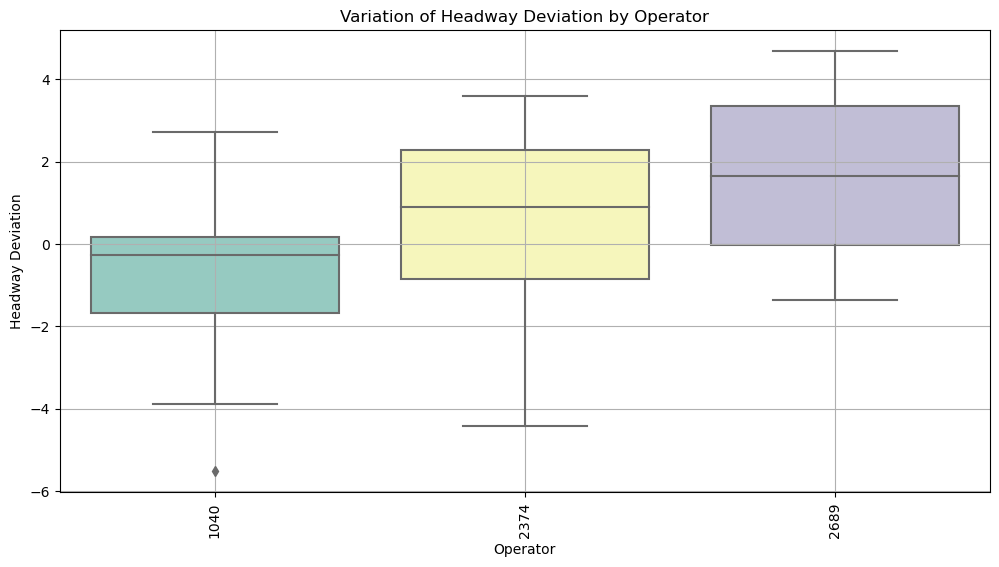

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Operator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [25]:
len(headway_data['OPERATOR'].unique())

334

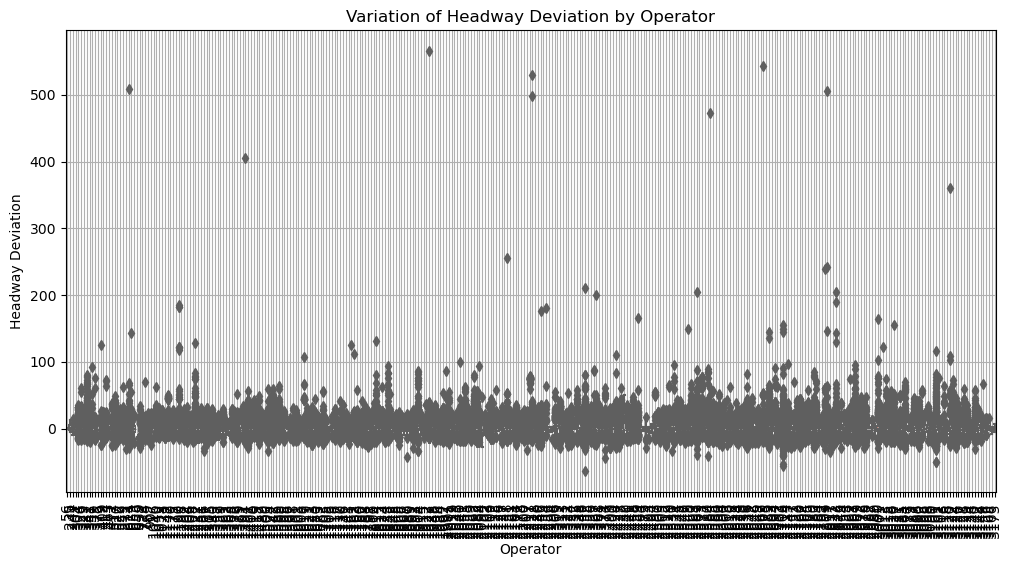

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=headway_data, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Operator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

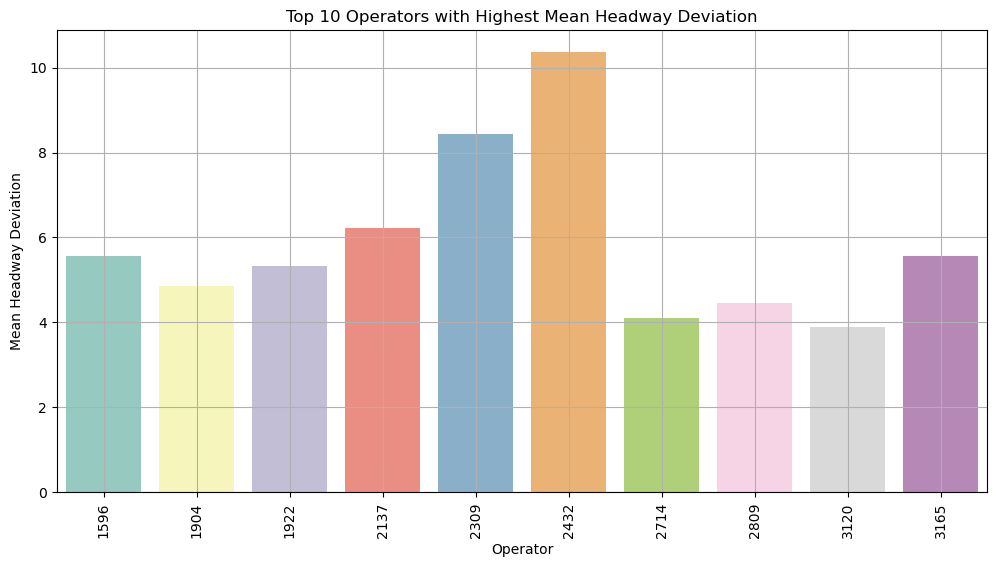

In [27]:
# Group the data by 'OPERATOR' and calculate the mean headway deviation for each operator
operator_mean_hdwy_dev = headway_data.groupby('OPERATOR')['HDWY_DEV'].mean()

# Sort the operators by mean headway deviation in descending order and select the top N
top_n_operators = operator_mean_hdwy_dev.sort_values(ascending=False).head(10) # selecting top 10

# Create a bar chart for the top N operators
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_operators.index, y=top_n_operators, palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Mean Headway Deviation')
plt.title(f'Top {10} Operators with Highest Mean Headway Deviation')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [45]:
# Group the data by 'OPERATOR' and calculate the mean headway deviation for each operator
operator_mean_hdwy_dev = headway_data.groupby('OPERATOR')['HDWY_DEV'].mean()

# Define the lower and upper bounds for the margin
lower_bound = -5
upper_bound = 5

# Filter operators with mean headway deviation within the specified range
selected_operators = operator_mean_hdwy_dev[(operator_mean_hdwy_dev >= lower_bound) & (operator_mean_hdwy_dev <= upper_bound)]

# Sort the selected operators by their mean headway deviation in ascending order
sorted_selected_operators = selected_operators.sort_values()

# Select the top 10 operators with consistent margins
top_10_operators = sorted_selected_operators.head(10)

# Print the top 10 operators
print(top_10_operators)

OPERATOR
2338   -4.555556
2493   -3.862963
2646   -3.360834
2675   -2.629115
1706   -2.541892
1730   -2.414417
1606   -2.316667
3127   -2.297917
2563   -2.234500
2586   -2.165044
Name: HDWY_DEV, dtype: float64


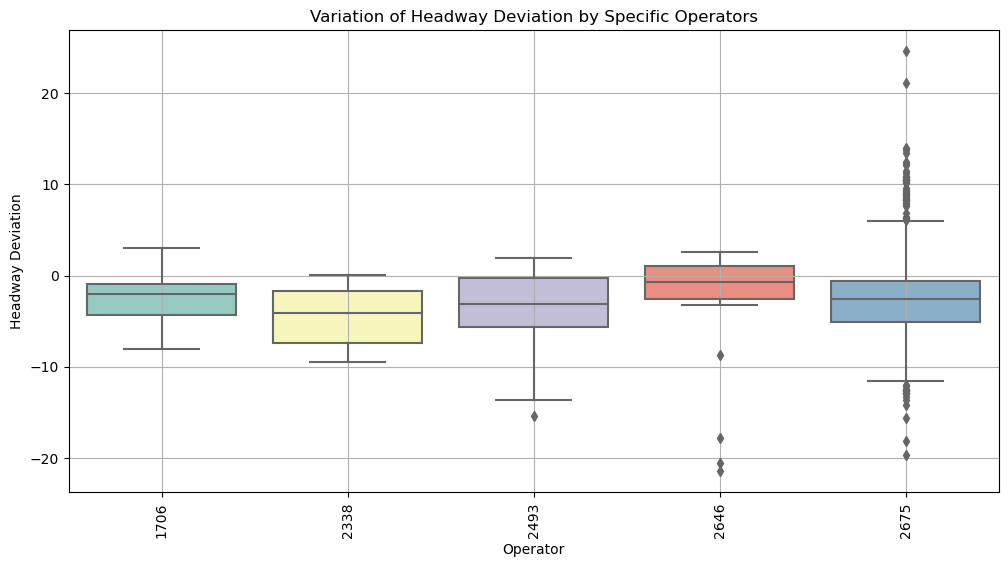

In [46]:
# Specify the list of specific operators you want to include
specific_operators = [2338, 2493, 2646, 2675, 1706]

# Filter the data to include only the specific operators
filtered_data = headway_data[headway_data['OPERATOR'].isin(specific_operators)]

# Create a box plot for the specific operators
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Specific Operators')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()